In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('Airline_review.csv')

In [72]:
import re

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    return text

df['cleaned_text'] = df['Review'].apply(clean_text)

In [50]:
label_mapping = {'no': 0, 'yes': 1}
df['Recommended'] = df['Recommended'].map(label_mapping)

In [52]:
X = df['cleaned_text']  
y = df['Recommended']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
vectorizer = CountVectorizer(stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)

In [56]:
classifier = MultinomialNB()

classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [58]:
y_pred = classifier.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9542610571736785
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      2815
           1       0.90      0.99      0.94      1820

    accuracy                           0.95      4635
   macro avg       0.95      0.96      0.95      4635
weighted avg       0.96      0.95      0.95      4635



In [60]:
import joblib

joblib.dump(classifier, 'text_classification_model.pkl')
joblib.dump(vectorizer, 'text_vectorizer.pkl')

['text_vectorizer.pkl']

In [62]:
model = joblib.load('text_classification_model.pkl')
vectorizer = joblib.load('text_vectorizer.pkl')

In [64]:
X_new_vec = vectorizer.transform(df['cleaned_text'])
predictions = classifier.predict(X_new_vec)
df['Recommended'] = ['no' if prediction == 0 else 'yes' for prediction in predictions]

print(df[['cleaned_text', 'Recommended']].head())

                                        cleaned_text Recommended
0   moroni to moheli turned out to be a pretty de...         yes
1   moroni to anjouan it is a very small airline ...          no
2   anjouan to dzaoudzi a very small airline and ...         yes
3   please do a favor yourself and do not fly wit...          no
4   do not book a flight with this airline my fri...          no


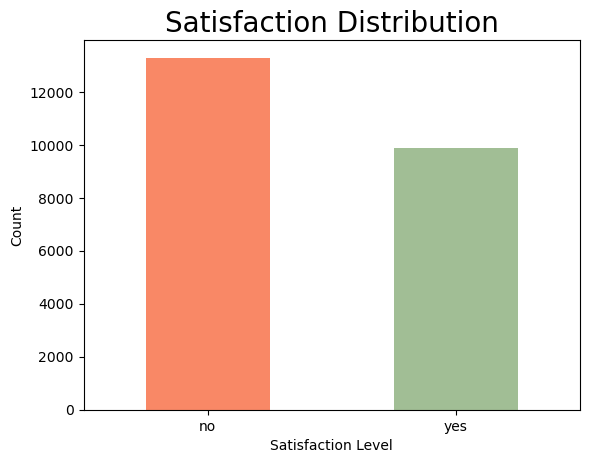

In [70]:
import matplotlib.pyplot as plt

df['Recommended'].value_counts().plot(kind='bar', color=['#F98866','#A1BE95'])

plt.title('Satisfaction Distribution',fontsize = 20)
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()